#  Vector Regressor definition and sample

In [1]:
import sklearn
from sklearn.svm import SVR
import numpy as np

class VectorRegression(sklearn.base.BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y):
        n, m = y.shape
        # Fit a separate regressor for each column of y
        self.estimators_ = [sklearn.base.clone(self.estimator).fit(X, y[:, i])
                               for i in range(m)]
        return self

    def predict(self, X):
        # Join regressors' predictions
        res = [est.predict(X)[:, np.newaxis] for est in self.estimators_]
        return np.hstack(res)

In [3]:
#Methods to sort as human expect
import re

def tryint(s):
    try:
        return int(s)
    except:
        return s
    
def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)
    


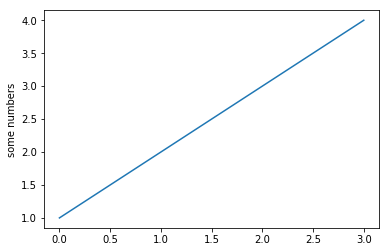

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [6]:
#Random values test
X = np.random.random((10,3))
y = np.random.random((10,2))
X2 = np.random.random((7,3))

#Regressor: scikit-learn estimator
clf = SVR()  
#clf = SVR(C=1.0, epsilon=0.2)

#Multidimensional regresor
r = VectorRegression(clf)
r.fit(X,y)

#Test trained regressor
y_pred = r.predict(X2)


#print("X", X)
#print("y", y)

print("X2", X2)
print("y_pred", y_pred)

('X2', array([[ 0.35687817,  0.63672379,  0.48184342],
       [ 0.21267318,  0.18908634,  0.07527389],
       [ 0.03312334,  0.49410753,  0.77905842],
       [ 0.95657016,  0.09404679,  0.46179397],
       [ 0.38296729,  0.31061565,  0.43331216],
       [ 0.89028876,  0.2228809 ,  0.65937166],
       [ 0.79359101,  0.86122121,  0.38152333]]))
('y_pred', array([[ 0.67945294,  0.47997069],
       [ 0.54426019,  0.50715984],
       [ 0.61307022,  0.68394435],
       [ 0.48138953,  0.34634653],
       [ 0.56663114,  0.51910496],
       [ 0.52283109,  0.39415069],
       [ 0.76493941,  0.2447229 ]]))


# Real data training

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import expanduser
import re 

#Load Data

dates = ["Oct18" , "Oct23" ]


train_path = []; test_path = []; labels_path = []; matchMatrixfileName = [];
 
matchMatrixes_Path = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/timeStampsAndMatchMatrixes')

for date in dates:

    train_path.append( os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/train_'  + date) )
    test_path.append(os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/test_'  + date) )
    labels_path.append(os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/vel'  + date) )

    matchMatrixfileName.append(os.path.join(matchMatrixes_Path, "convensionMatrix_" + date + ".npy" ) )


In [6]:
X = []
Y = []


for i in xrange(0, len(dates)):

    matchMatrix = np.load(matchMatrixfileName[i])

    all_names_train = os.listdir(train_path[i])

    for name in all_names_train:
        identifierMap = int(re.findall('\d+', name )[0])

        feat_map = np.load(os.path.join(train_path[i], name))

        identifierVel = matchMatrix[np.where(matchMatrix == identifierMap)[0][0],1]

        label = np.load(os.path.join(labels_path[i], "vel_"+str(identifierVel+1) + ".npy")) #+1 it's Because Vel names were saved starting from 1 instead of 0  

        X.append(feat_map.flatten())
        Y.append(label)


In [7]:
X = np.array(X)
Y = np.array(Y)
print "Shape X: " + str(X.shape)
print "Shape Y: " + str(Y.shape)

Shape X: (5428, 92160)
Shape Y: (5428, 2)


## SVR

In [6]:
#Regressor: scikit-learn estimator
clf = SVR()  
#clf = SVR(C=1.0, epsilon=0.2)

#Multidimensional regresor
r = VectorRegression(clf)
r.fit(X,Y)

VectorRegression(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

## MLP

In [8]:
#MLPRegressor
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

n = mlp.fit(X,Y)

In [9]:
n

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=9, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Model storage

In [7]:
#Save model SVR
import cPickle
# save the classifier
with open('VectorRegressor.pkl', 'wb') as fid:
    cPickle.dump(r, fid)    

In [10]:
#Save model MPL
import cPickle
# save the model
with open('MLP_Regressor.pkl', 'wb') as fid:
    cPickle.dump(mlp, fid)    

In [17]:
#Load model
import cPickle
regFileName = 'VectorRegressor_AllData.pkl'# 'MLP_Regressor.pkl' 
model_path =  os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/'  + regFileName )

with open(model_path, 'rb') as fid:
    r_loaded = cPickle.load(fid)
    

## TEST

In [11]:
#TEST

X = []
Y = []

for i in xrange(0, len(dates)):

    matchMatrix = np.load(matchMatrixfileName[i])

    all_names_test = os.listdir(test_path[i])
    sort_nicely(all_names_test)  

    for name in all_names_test:
        identifierMap = int(re.findall('\d+', name )[0])

        feat_map = np.load(os.path.join(test_path[i], name))

        identifierVel = matchMatrix[np.where(matchMatrix == identifierMap)[0][0],1]

        label = np.load(os.path.join(labels_path[i], "vel_"+str(identifierVel+1) + ".npy")) #+1 it's Because Vel names were saved starting from 1 instead of 0  

        X.append(feat_map.flatten())
        Y.append(label)
    
X = np.array(X)
Y = np.array(Y)
print "Shape X: " + str(X.shape)
print "Shape Y: " + str(Y.shape)

Shape X: (1356, 92160)
Shape Y: (1356, 2)


## TEST SVR 

In [18]:
#Test trained SVR regressor
Y_pred = r_loaded.predict(X)
#Y_pred = r.predict(X)


## Test MLP

In [12]:
#Test trained MLP regressor
Y_pred = mlp.predict(X)

## Plot test

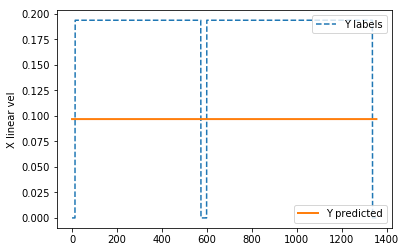

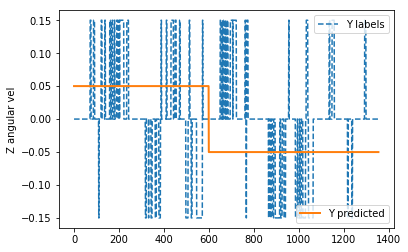

In [19]:
line1, = plt.plot(Y[:,0], label="Y labels", linestyle='--')
line2, = plt.plot(Y_pred[:,0], label="Y predicted", linewidth=2)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)
# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)
plt.ylabel("X linear vel")
plt.show()



line1, = plt.plot(Y[:,1], label="Y labels", linestyle='--')
line2, = plt.plot(Y_pred[:,1], label="Y predicted", linewidth=2)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)
# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)
plt.ylabel("Z angular vel")
plt.show()

In [12]:
Y

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       ..., 
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [13]:
Y_pred

array([[ 0.19573888,  0.03134159],
       [ 0.19573888,  0.03134159],
       [ 0.19573888,  0.03134159],
       ..., 
       [ 0.19573888,  0.03134159],
       [ 0.19573888,  0.03134159],
       [ 0.19573888,  0.03134159]])

## Error calculation to evaluate regressor 


In [20]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(Y , Y_pred , multioutput='raw_values')

array([ 0.00938091,  0.00769233])

# Initial experiments

In [3]:
#---------------------
#Example predicting pair numbers

X =  np.array([[0, 1 , 2] , [6, 7, 8],[0, 1 , 2 ] , [ 6, 7, 8]])
y =  np.array([[2 , 4 , 6 ] , [14 , 16 , 18], [2 , 4 , 6] , [14 , 16 , 18]])
X2 = np.array([[3 ,4 , 5], [3 ,4 , 5]])
#Regressor: scikit-learn estimator
clf = SVR()
#Multidimensional regresor
r = VectorRegression(clf)
r.fit(X,y)

#Test trained regressor
y_pred = r.predict(X2)


print("X", X)
print("y", y)

print("X2", X2)
print("y_pred", y_pred)


('X', array([[0, 1, 2],
       [6, 7, 8],
       [0, 1, 2],
       [6, 7, 8]]))
('y', array([[ 2,  4,  6],
       [14, 16, 18],
       [ 2,  4,  6],
       [14, 16, 18]]))
('X2', array([[3, 4, 5],
       [3, 4, 5]]))
('y_pred', array([[  8.,  10.,  12.],
       [  8.,  10.,  12.]]))


# ------------------------------------------
Real feature maps

In [4]:
import numpy as np
from sklearn.svm import SVR
import cv2
import os

path = "examp_feat_maps/"

feat_names = os.listdir(path)
all_feat = []
#Read images
for filename in feat_names:
    #Load feature map
    array = np.load(os.path.join(path, filename)) 
    xi = array.flatten()
    
    all_feat.append(xi)
    
all_feat = np.asarray(all_feat)

print("Examples shape:" , all_feat.shape)

('Examples shape:', (26, 92160))


In [6]:
import math

#Test feature maps
#Front: [1 , 0 ] 
#Right: [math.cos(10) , math.sin(10)]
#Left: [math.cos(170) , math.sin(170)]

y =  np.array([[1 , 0 ], 
               [math.cos(10) , math.sin(10)], 
               [1 , 0 ],
               [math.cos(170) , math.sin(170)], 
               [1 , 0 ], 
               [1 , 0 ], 
               [1 , 0 ],
               [math.cos(10) , math.sin(10)], 
               [1 , 0 ], 
               [1 , 0 ], 
               [math.cos(10), math.sin(10)],
               [math.cos(10) , math.sin(10)],
               [math.cos(10) , math.sin(10)],  
               [1 , 0 ], 
               [1 , 0 ], 
               [math.cos(10) , math.sin(10)],
               [1 , 0 ],
               [math.cos(170) , math.sin(170)],
               [math.cos(10) , math.sin(10)],
               [1 , 0 ],
               [1 , 0 ],
               [math.cos(170) , math.sin(170)],
               [math.cos(170) , math.sin(170)],
               [1 , 0 ],
               [math.cos(170) , math.sin(170)] ])#,
               #[1 , 0 ]]) 
print(y .shape)
y

(25, 2)


array([[ 1.        ,  0.        ],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 0.93799475,  0.34664946],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [-0.83907153, -0.54402111],
       [-0.83907153, -0.54402111],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 0.93799475,  0.34664946],
       [-0.83907153, -0.54402111],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.93799475,  0.34664946],
       [ 0.93799475,  0.34664946],
       [ 1.        ,  0.        ],
       [ 0.93799475,  0.34664946]])

In [7]:
X = all_feat[0:-1,:]

print(X .shape)

#Regressor: scikit-learn estimator
clf = SVR()
#Multidimensional regresor
r = VectorRegression(clf)
r.fit(X,y)

(25, 92160)


VectorRegression(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

In [8]:
#Predict output for the last example which was not included in training
y_pred = r.predict(X[-1, :])
y_pred

/home/mcalvarez/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/mcalvarez/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.83792907,  0.20846471]])

In [9]:
#Accuracy calculation 
diff = y - y_pred
percent = 100.*(np.where((diff == 0) | (abs(diff)<1e-05))[0].shape[0])
percent

0.0